In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Load the dataset
df = pd.read_csv("C:\\Users\\patil\\Downloads\\AB_NYC_2019.csv")

In [4]:
# Display basic information about the dataset
print("Initial Data Overview:")
print(df.info())
print(df.head())


Initial Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_revi

In [5]:
# Data Integrity Check
print("\nChecking for missing values:")
print(df.isnull().sum())


Checking for missing values:
id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [6]:
# Handling Missing Data
# Fill missing numerical values with median and categorical values with mode
df.fillna({
    col: df[col].median() if df[col].dtype in ['int64', 'float64'] else df[col].mode()[0] 
    for col in df.columns if df[col].isnull().sum() > 0
}, inplace=True)

print("\nMissing values after imputation:")
print(df.isnull().sum())


Missing values after imputation:
id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64


In [7]:
# Removing Duplicates
df.drop_duplicates(inplace=True)
print("\nDuplicate values removed. Remaining records:", len(df))



Duplicate values removed. Remaining records: 48895


In [8]:
# Standardization - Convert column names to lowercase and replace spaces with underscores
df.columns = df.columns.str.lower().str.replace(" ", "_")


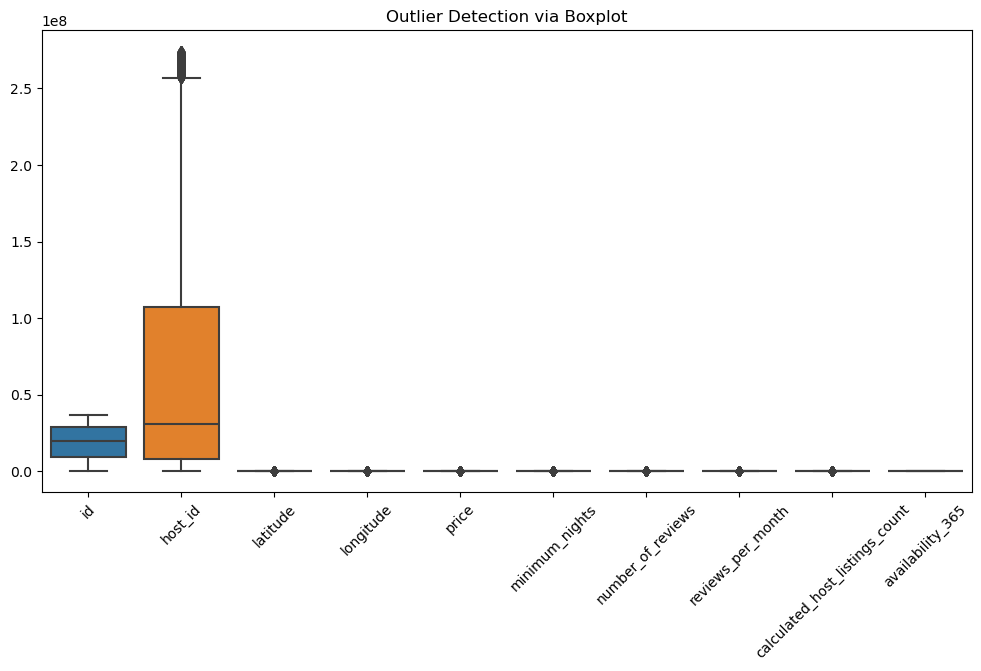

In [9]:
# Outlier Detection using Boxplot
numeric_cols = df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_cols])
plt.xticks(rotation=45)
plt.title("Outlier Detection via Boxplot")
plt.show()

In [10]:
# Removing Outliers using IQR method
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

In [11]:
df_cleaned = remove_outliers(df, numeric_cols)
print("\nData shape after outlier removal:", df_cleaned.shape)


Data shape after outlier removal: (17506, 16)


In [16]:
# Save cleaned data
df.to_csv("ABNYC_cleaned.csv", index=False)
print("Cleaned data saved as ABNYC_cleaned.csv")


Cleaned data saved as ABNYC_cleaned.csv


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
CA_df = pd.read_csv("C:\\Users\\patil\\Downloads\\CAvideos.csv")
print(CA_df)

          video_id trending_date  \
0      n1WpP7iowLc      17.14.11   
1      0dBIkQ4Mz1M      17.14.11   
2      5qpjK5DgCt4      17.14.11   
3      d380meD0W0M      17.14.11   
4      2Vv-BfVoq4g      17.14.11   
...            ...           ...   
40876  sGolxsMSGfQ      18.14.06   
40877  8HNuRNi8t70      18.14.06   
40878  GWlKEM3m2EE      18.14.06   
40879  lbMKLzQ4cNQ      18.14.06   
40880  POTgw38-m58      18.14.06   

                                                   title     channel_title  \
0             Eminem - Walk On Water (Audio) ft. Beyoncé        EminemVEVO   
1                          PLUSH - Bad Unboxing Fan Mail         iDubbbzTV   
2      Racist Superman | Rudy Mancuso, King Bach & Le...      Rudy Mancuso   
3                               I Dare You: GOING BALD!?          nigahiga   
4            Ed Sheeran - Perfect (Official Music Video)        Ed Sheeran   
...                                                  ...               ...   
40876                

In [7]:
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review       

In [8]:
print("\nFirst 5 Rows:")
print(df.head())


First 5 Rows:
     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1        

In [9]:
# 1. Handling Missing Values
print("\nMissing Values Before Handling:")
print(df.isnull().sum())


Missing Values Before Handling:
id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [10]:
# Impute missing values with mean for numerical columns and mode for categorical ones
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].mean(), inplace=True)

print("\nMissing Values After Handling:")
print(df.isnull().sum())



Missing Values After Handling:
id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64


In [11]:
# 2. Removing Duplicates
df.drop_duplicates(inplace=True)
print("\nDataset Shape After Removing Duplicates:", df.shape)


Dataset Shape After Removing Duplicates: (48895, 16)


In [12]:
# 3. Standardization (Convert column names to lowercase, remove spaces)
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

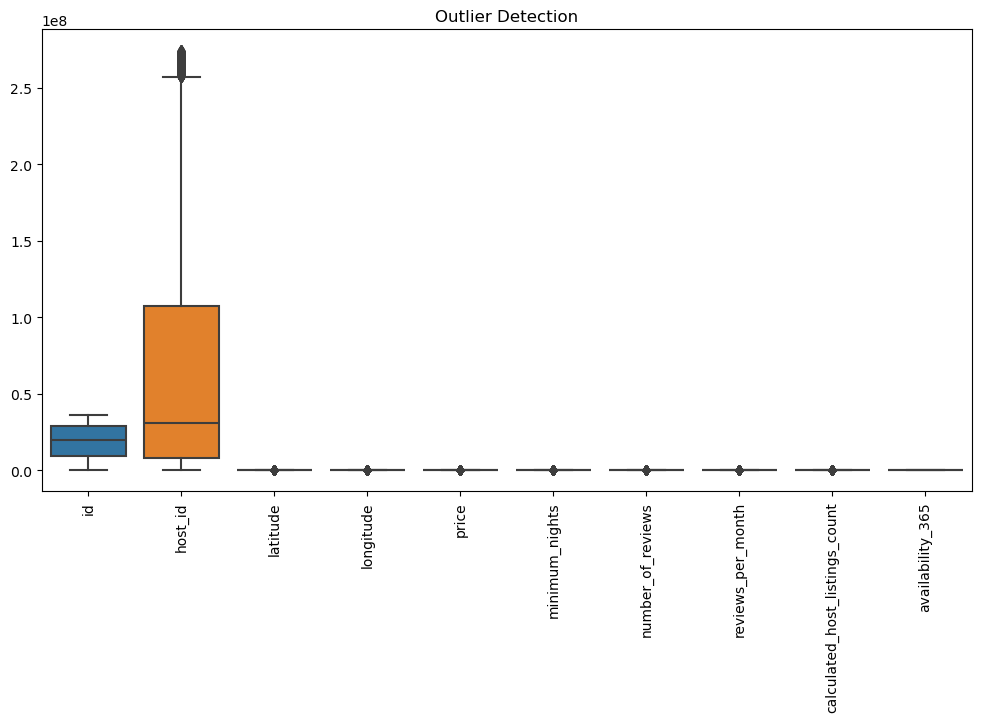

In [13]:
# 4. Outlier Detection using Boxplots
numeric_cols = df.select_dtypes(include=['number']).columns
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_cols])
plt.xticks(rotation=90)
plt.title("Outlier Detection")
plt.show()

In [14]:
# Removing outliers using IQR method
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

for col in numeric_cols:
    df = remove_outliers(df, col)

print("\nDataset Shape After Removing Outliers:", df.shape)


Dataset Shape After Removing Outliers: (23268, 16)


In [15]:
# Save cleaned data
df.to_csv("CAvideos_cleaned.csv", index=False)
print("Cleaned data saved as CAvideos_cleaned.csv")


Cleaned data saved as CAvideos_cleaned.csv
